# 데이터 전처리
## 데이터 전처리, 표준점수, 브로드캐스팅
올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거친다. 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일을 변환하는 방법을 알 수 있다. 

## 넘파이로 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

ch02_1에서는 zip을 통해 파이썬 리스트를 순회하면서 생선 하나의 길이와 무게를 리스트 안의 리스트로 직접 구성했지만, 넘파이를 사용하면 훨씬 간편하게 만들 수 있다. 

In [2]:
import numpy as np

### column_stack()
전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결한다. 

In [3]:
# 튜플은 수정할 수 없기 때문에 매개변수 값으로 많이 사용한다. 
np.column_stack(([1, 2, 3], [4, 5, 6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
# 넘파이 배열은 리스트처럼 한줄로 길게 출력되지 않고 행과 열을 맞추어 출력해준다. 
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


### np.ones(), np.zeros()
넘파이를 이용하면 `np.ones()`, `np.zeros()`함수를 이용해 각각 원하는 개수의 1과 0을 채운 배열을 만들어 준다.

In [6]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


### np.concatenate()
첫 번째 차원을 따라 배열을 연결한다. 
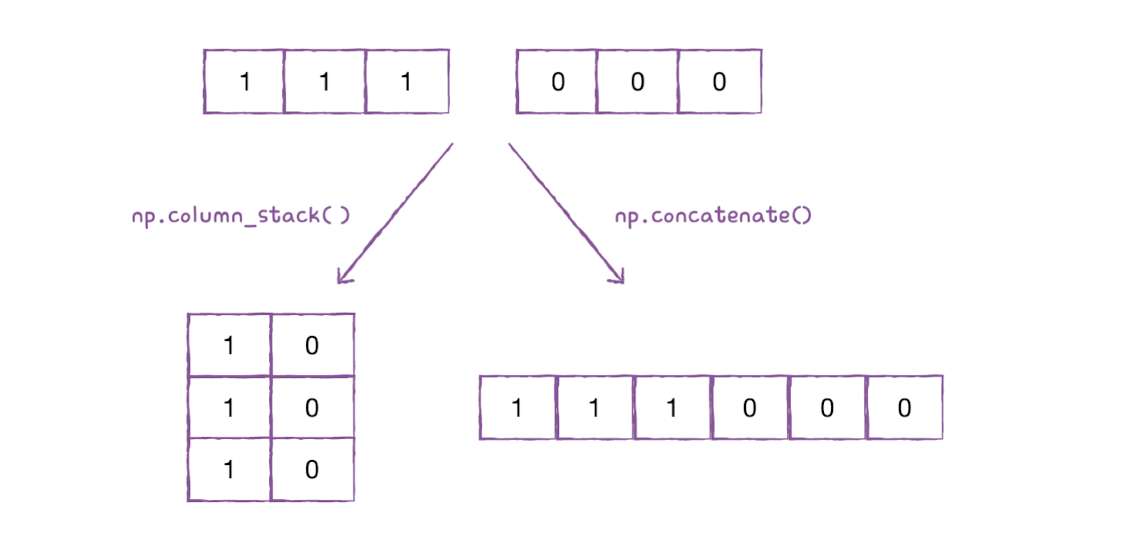

In [7]:
# 1이 도미, 2가 빙어
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [8]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


💡데이터가 클수록 파이썬 리스트는 비효율적이므로, 넘파이 배열을 사용하는 것이 좋다. 

## 사이킷런으로 훈련 세트와 테스트  세트 나누기
사이킷런은 다양한 유틸리티 도구도 제공하는데, train_test_split()을 이용하면 전달되는 리스트나 배열의 비율에 맞게 훈련 세트와 테스트 세트로 나누어주고, 나누기 전에 알아서 섞어 준다.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [11]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [12]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [13]:
# 도미와 빙어가 잘 섞였는지 확인
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


13개의 테스트 세트 중에 10개가 도미(1)이고, 3개가 빙어(0)이다. 빙어의 비율이 조금 모자라다. 원래 도미와 빙어의 개수가 35개와 14개이므로 두 생선의 비율은 2.5:1이다. 그런데 이 테스트 세트의 도미와 빙어의 비울은 3.3:1이다.

➡️ 샘플링 편향! 

📌무작위로 데이터를 나누었을 때, 샘플이 골고루 섞이지 않을 수 있다. 특히 위의 경우처럼 일부 클래스의 개수가 적을 때 발생한다. 훈련 세트와 테스트 세트에 샘플의 클래스 비율이 일정하지 않다면 모델이 일부 샘플을 올바르게 학습할 수 없다. 

💡**train_test_split()의 stratify매개변수**에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다.훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을때 특히 유용하다.

In [14]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state = 42)

In [15]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한 마리

### k-최근접 이웃은 훈련 데이터를 저장하는 것이 훈련의 전부
새로운 데이터포인트가 주어지면 KNN은 저장된 훈련 데이터와의 거리를 계산하여 가장 가까운 k개의 이웃을 찾는, 그 k개의 이웃을 참고해 판단한다. 
데이터의 패턴이나 구조를 학습한다기보다는, 단순히 주어진 데이터에 기반하여 의사결정을 한다. 즉, 분포에 따라 데이터가 어떻게 나타나는지를 인식하는 방식! 데이터에 대한 추론이나 모델링이 아니라, 데이터의 사례에 직접적으로 의존한다는 것을 의미한다. 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [17]:
# 정확도가 100%인데 왜? 
print(kn.predict([[25, 150]]))

[0.]


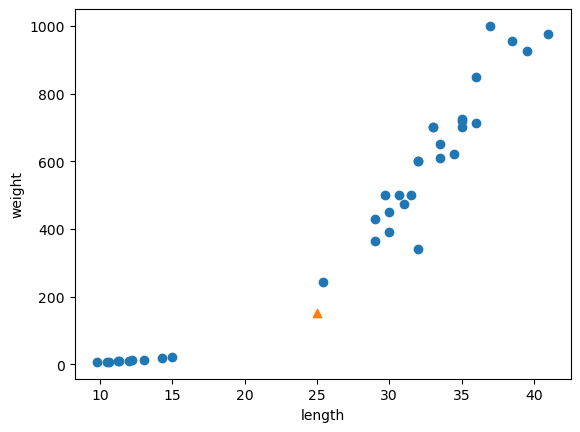

In [18]:
# 이 샘플을 다른 테이터와 함께 산점도로 그려보기
# 시각화를 하면 확실하게 알 수 있으니, 뭔가 문제가 생기면 시각화를 해보자
import matplotlib.pyplot as plt
# x는 length, y는 weight (feature)
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker='^') # marker는 매개변수 모양을 지정한다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

분명 위로 뻗어 있는 다른 도미 데이터에 더 가까운데 왜 왼쪽 아래 낮게 깔린 빙어 데이터에 가깝다고 판단한 걸까?

#### kneighbors()
📍KNN은 주변의 샘플 중 "다수"인 클래스를 예측한다. KNN클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아 주는 **kneighbors()메서드**를 제공한다. 이 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환한다. 기본값은 5개이므로 5개가 반환!

return_distance 매개변수를 false로 지정하면 이웃 샘플의 인덱스만 반환하고 거리는 반환하지 않는다.(기본값은 true)

In [19]:
distances, indexes = kn.kneighbors([[25, 150]])

Text(0, 0.5, 'weight')

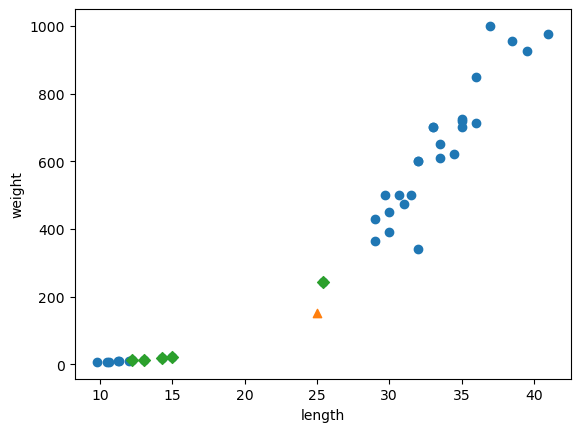

In [20]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

In [21]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [22]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


산점도를 보면 직관적으로 도미에 가깝게 보이는데 왜 가장 가까운 이웃을 빙어라고 생각한 걸까? distances배열을 출력해보면 알 수 있다. 

In [23]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


💡그래프를 확인하면, x축은 범위가 좁고(10-40) y축은 범위가 넓어(0-1000) y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산되기 때문에 도미 샘플이 이웃으로 선택되지 못한 것

📍시각화 위해 x축의 범위를 동일하게 0~1000으로 맞춰 보기 ->
xlim()함수를 사용하기

Text(0, 0.5, 'weight')

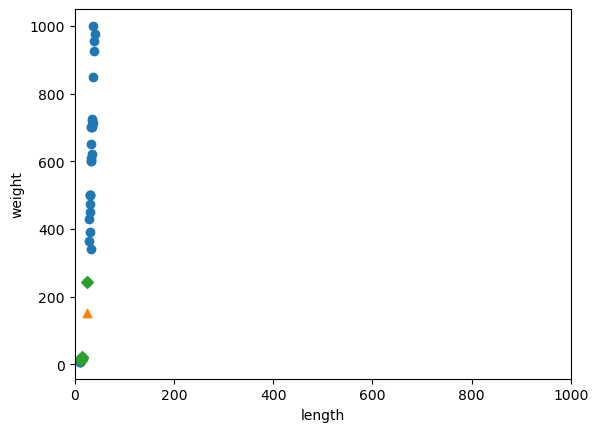

In [24]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim(0, 1000)
plt.xlabel('length')
plt.ylabel('weight')

## 기준을 맞춰라 : 스케일
두 특성(길이와 무게)의 값의 범위가 매우 다르다 = 스케일이 다르다 
데이터를 표현하는 기준이 다르면 (cm,kg)알고리즘이 올바르게 예측할 수 없다.

📌특히, 거리 기반 알고리즘(KNN 등)은 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 <u>**일정한 기준**</u>으로 맞춰 주어야 한다. 

**<u>✨위의 과정이 데이터 전처리이다!</u>**

+) 모든 알고리즘이 거리 기반이 아니다. 트리 기반 알고리즘들은 특성의 스케일이 다르더라도 잘 작동한다. (ch05)

### 표준점수(z 점수)(standard score)
가장 널리 사용하는 전처리 방법 중 하나
각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다. 

In [25]:
# 평균 계산
mean = np.mean(train_input, axis=0)

# 표준편차 계산
std = np.std(train_input, axis=0)

## 특성마다 스케일이 다르므로 평균과 표준편차는 각 특성별로 계산해야 한다.
## 이를 위해 axis = 0으로 지정
## 행을 따라 각 열의 통계 값을 계산한다. 

In [26]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [27]:
# 표준점수 = (원본 데이터 - 평균 ) / 표준편차 (수학에서 1 표준편차 !! )
train_scaled = (train_input - mean) /  std

### 브로드캐스팅(broadcasting)
넘파이는 train_input의 모든 행에서 mean에 있는 두 평균값을 빼준다. 그리고 std에 있는 두 표준편차를 다시 모든 행에 적용한다. 

➡️ 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능이다. 

📍브로드캐스팅은 넘파일 배열 사이에서 가능하다! (train_input, mean, std가 모두 넘파이 배열이다)

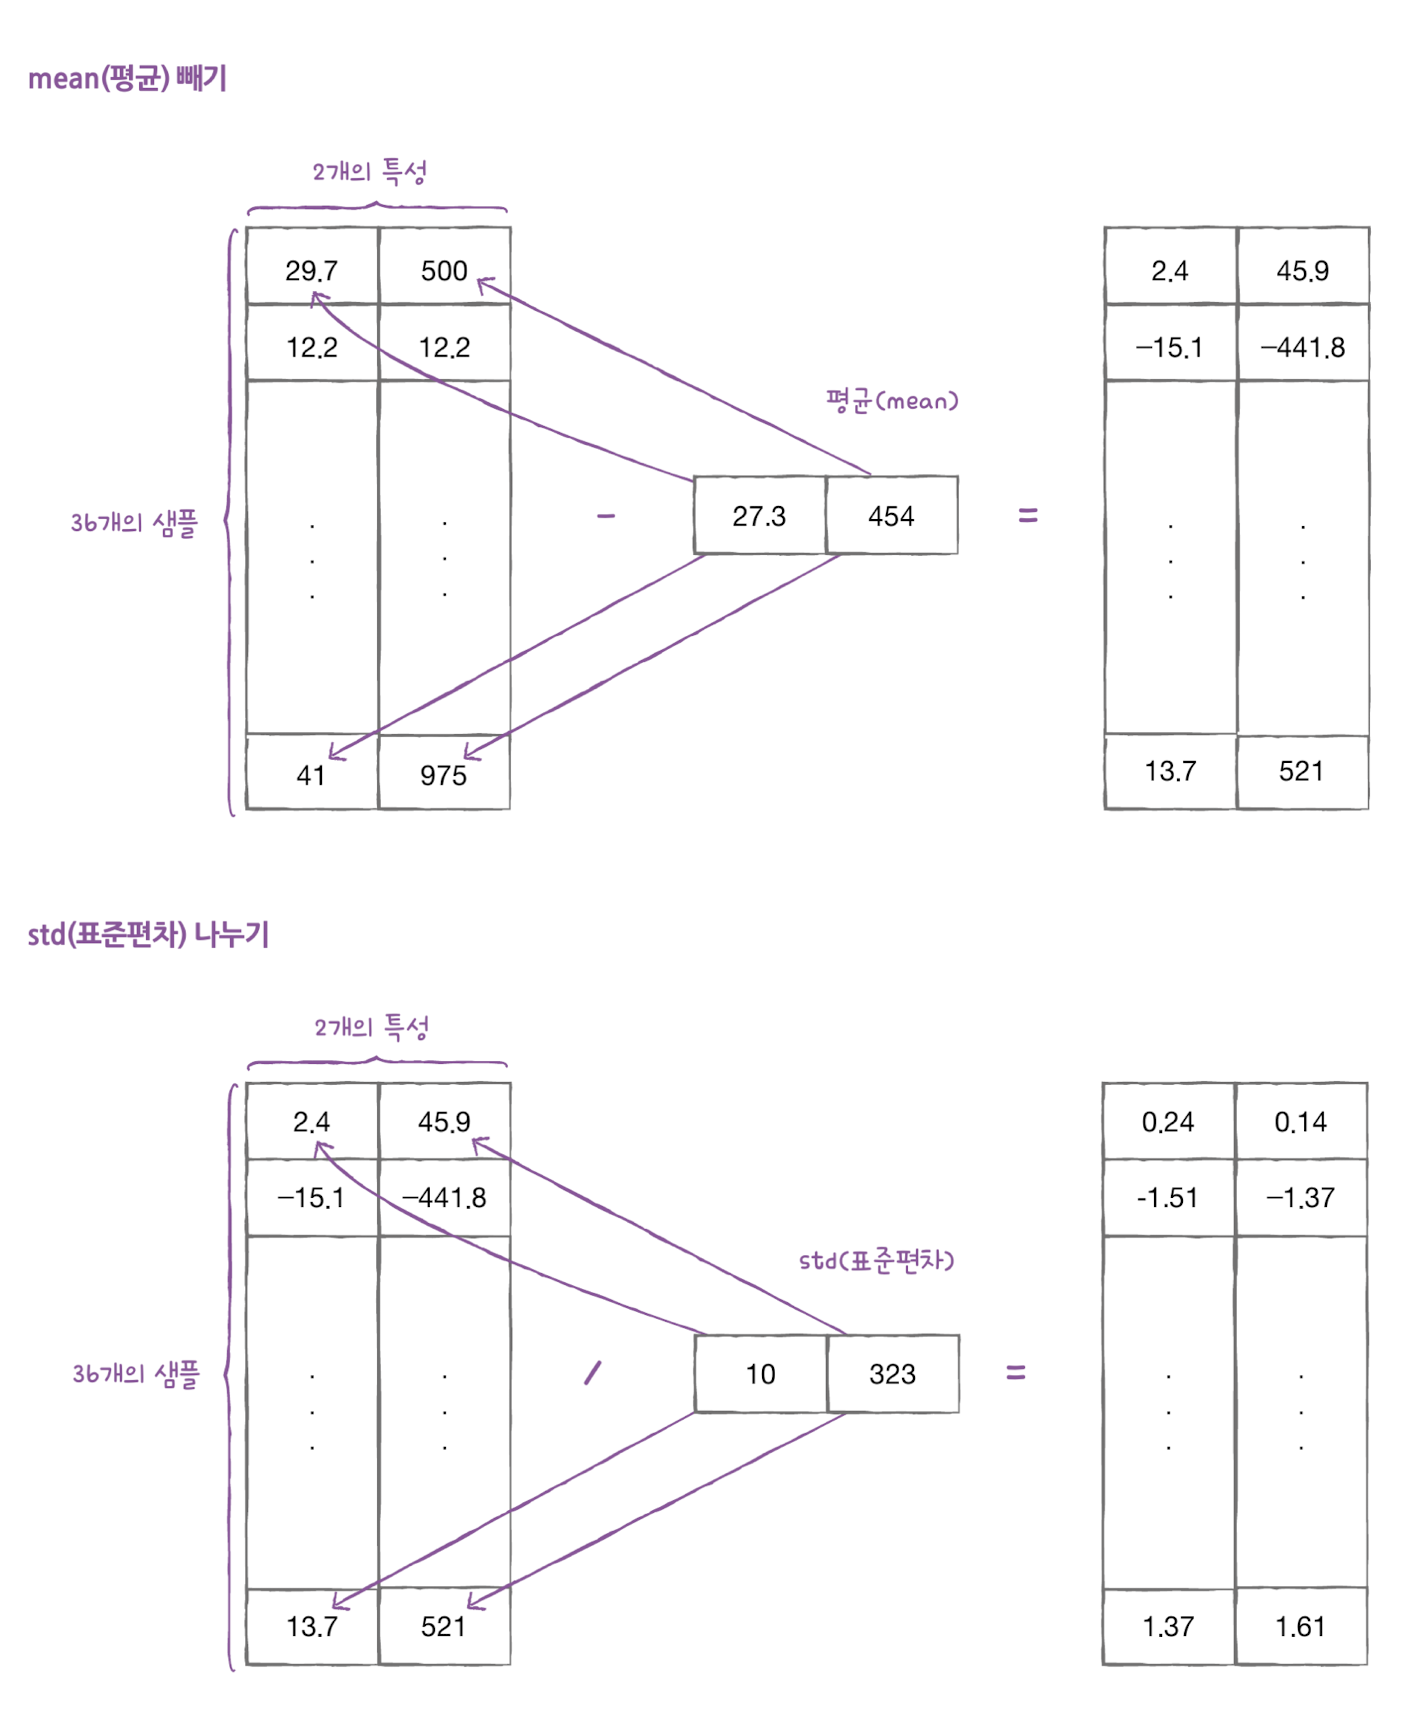

## 전처리 데이터로 모델 훈련하기

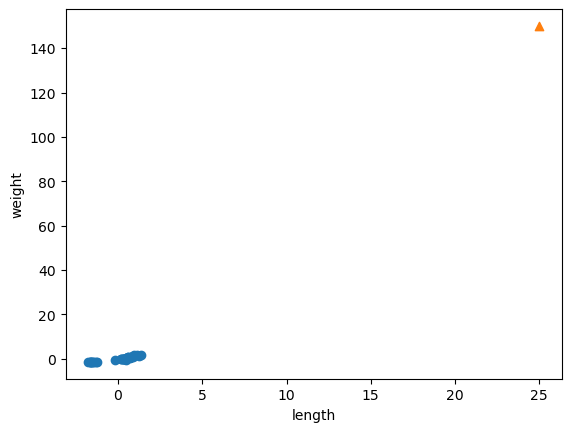

In [29]:
# 표준점수로 변환한 train_scaled을 살펴보기 위해 산점도
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

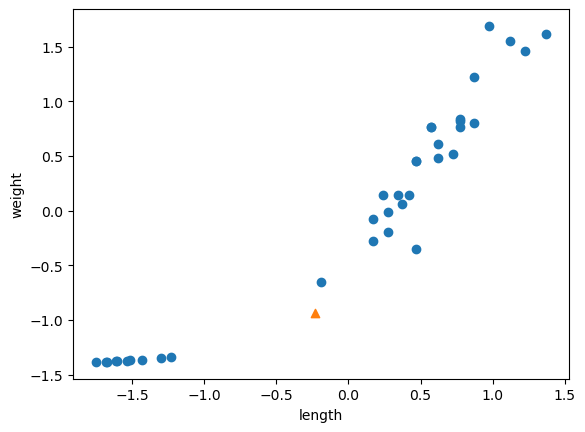

In [30]:
# 샘플 [25, 150] 도 똑같이 표준점수로 변환해줘야 한다. 
# 중요 ! 훈련 세트의 mean, std를 이용해서 변환해야 한다. 
new = ([25, 150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위의 그래프는 표준편차로 변환하기 전의 산점도와 거의 동일하지만, x축과 y축의 범위가 -1.5 ~ 1.5사이로 바뀌었다는 차이가 있다. 

📍훈련 데이터의 두 특성이 비슷한 범위를 차지하고 있으므로 해결!

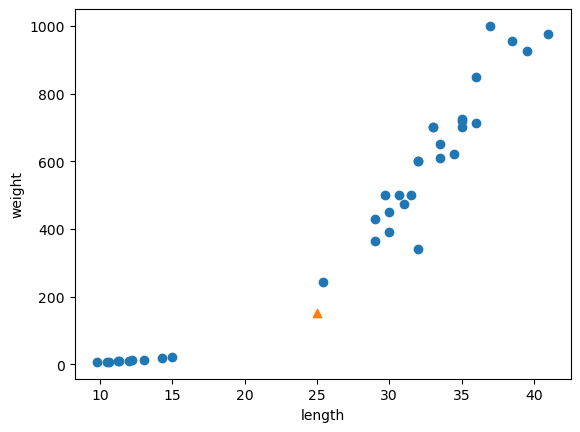

In [31]:
# 표준편차로 변환하기 전의 산점도 다시 보기
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker='^') # marker는 매개변수 모양을 지정한다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [33]:
# 테스트 세트도 훈련 세트의 평균과 표준편차로 변환해야 한다.
# 그렇지 않으면 데이터의 스케일이 같아지지 않아 훈련 모델이 쓸모없게 된다.
# 학습한 스케일로 변환하는 것이 필요!! 같은 스케일로 산점도를 그릴 수 있다. 

test_scaled = (test_input - mean) / std

In [34]:
kn.score(test_scaled, test_target)

1.0

In [35]:
print(kn.predict([new]))

[1.]


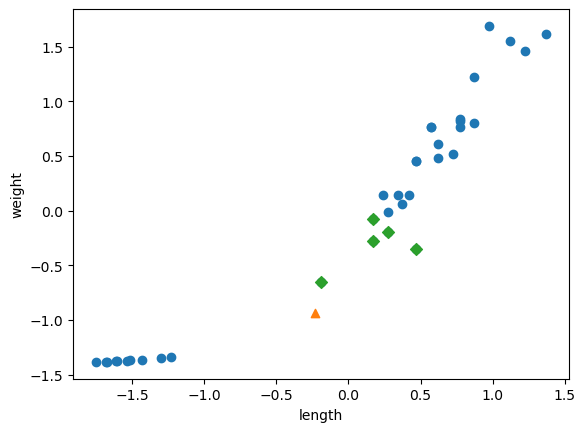

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]] [[21 14 34 32  5]]


In [40]:
# kneighbors()로 샘플의 k-최근접 이웃을 구한 다음 산점도로 그리기
# 특성을 표준점수로 바꾸었기 때문에 k-최근접 이웃 알고리즘이 올바르게 거리 측정
# 가장 가까운 이웃에 변화가 생겼을 것

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(distances, indexes)

📌대부분의 머신러닝 알고리즘은 특성의 스케일이 다르면 잘 작동하지 않기 때문에 표준점수로 변환해 스케일을 맞춰 줘야 한다. 특성의 스케일을 조정하는 방법은 표준점수말고도 더 있지만, 대부분의 경우 표준점수로 충분하다.(가장 널리 사용하는 방법)

데이터를 전처리할 때 주의할 점은 훈련 세트를 변환한 방식 그대로 테스트 세트를 변환해야 한다는 것! ➡️ 당연히 머신러닝 모델이 학습한 대로 맞춰 줘야지 아니면 스케일이 엉뚱하게 바뀌어서 제대로 된 예측이 불가능하다. 